<a href="https://colab.research.google.com/github/seonghaiiiii/busan-car-accident/blob/main/eclo_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/대구교통사고/data/train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [ ]:
train.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [ ]:
train_df = train[['사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','법규위반','사망자수','중상자수','경상자수','부상자수','ECLO']]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고일시    39609 non-null  object
 1   요일      39609 non-null  object
 2   기상상태    39609 non-null  object
 3   시군구     39609 non-null  object
 4   도로형태    39609 non-null  object
 5   노면상태    39609 non-null  object
 6   사고유형    39609 non-null  object
 7   법규위반    39609 non-null  object
 8   사망자수    39609 non-null  int64 
 9   중상자수    39609 non-null  int64 
 10  경상자수    39609 non-null  int64 
 11  부상자수    39609 non-null  int64 
 12  ECLO    39609 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.9+ MB


In [ ]:
train_df.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO
0,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5
1,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,기타,0,0,1,0,3
2,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,안전운전불이행,0,0,1,0,3
3,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5
4,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,안전운전불이행,0,0,1,0,3


#2019&2020데이터, 2021데이터 분리


In [ ]:
# '사고일시' 열을 datetime 타입으로 변환
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])

# '년도', '월', '일', '시간' 열 추가
train_df['year'] = train_df['사고일시'].dt.year
train_df['month'] = train_df['사고일시'].dt.month
train_df['day'] = train_df['사고일시'].dt.day
train_df['hour'] = train_df['사고일시'].dt.hour

<ipython-input-9-43ce9faddc7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])
<ipython-input-9-43ce9faddc7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['year'] = train_df['사고일시'].dt.year
<ipython-input-9-43ce9faddc7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
train_df.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,year,month,day,hour
0,2019-01-01 00:00:00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5,2019,1,1,0
1,2019-01-01 00:00:00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,기타,0,0,1,0,3,2019,1,1,0
2,2019-01-01 01:00:00,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,안전운전불이행,0,0,1,0,3,2019,1,1,1
3,2019-01-01 02:00:00,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5,2019,1,1,2
4,2019-01-01 04:00:00,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,안전운전불이행,0,0,1,0,3,2019,1,1,4


In [ ]:
train_df = train_df.drop(['사고일시'],axis = 1)
train_df = train_df.drop(['day'],axis = 1)

In [ ]:
# 'year' 열을 기준으로 2019, 2020년과 2021년 데이터 분리
train_1920= train_df[(train_df['year'] == 2019) | (train_df['year'] == 2020)]
test_21 = train_df[train_df['year'] == 2021]

#결측치 밎 이상치 확인


In [ ]:
train_1920.isnull().sum()

요일       0
기상상태     0
시군구      0
도로형태     0
노면상태     0
사고유형     0
법규위반     0
사망자수     0
중상자수     0
경상자수     0
부상자수     0
ECLO     0
year     0
month    0
hour     0
dtype: int64

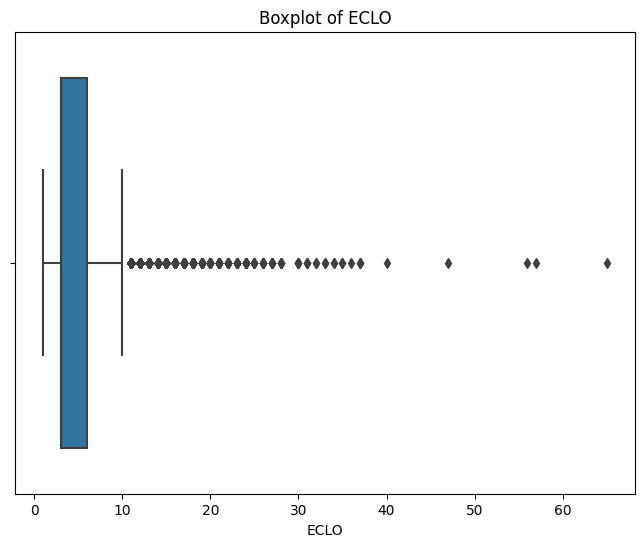

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ECLO 열에 대한 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_1920['ECLO'])
plt.title('Boxplot of ECLO')
plt.show()

In [ ]:
# # ECLO가 40 이상인 행 선택
# eclo_over_40 = train_1920[train_1920['ECLO'] >= 40]

# # 선택된 행 출력
# eclo_over_40

,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,year,month,hour
354,토요일,비,대구광역시 달성군 유가읍,교차로 - 교차로안,젖음/습기,차대차,신호위반,2,4,0,0,40,2019,1,5
5358,목요일,맑음,대구광역시 달서구 송현동,교차로 - 교차로부근,건조,차대차,차로위반,0,1,14,0,47,2019,5,19
10155,일요일,맑음,대구광역시 동구 신평동,단일로 - 기타,젖음/습기,차량단독,과속,1,2,15,0,65,2019,9,15
10834,월요일,비,대구광역시 달성군 논공읍,교차로 - 교차로부근,젖음/습기,차대차,안전운전불이행,0,4,12,0,56,2019,10,17
12632,일요일,맑음,대구광역시 수성구 만촌동,단일로 - 기타,건조,차대차,안전운전불이행,1,4,9,0,57,2019,11,11


In [ ]:
# ECLO가 40 이상인 행 제거
train_1920 = train_1920[train_1920['ECLO'] < 40]

#ECLO 그룹화

In [ ]:
train_df['ECLO'].describe()

count    39609.000000
mean         4.726704
std          3.207206
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         74.000000
Name: ECLO, dtype: float64

In [ ]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.7 MB/s eta 0:00:00


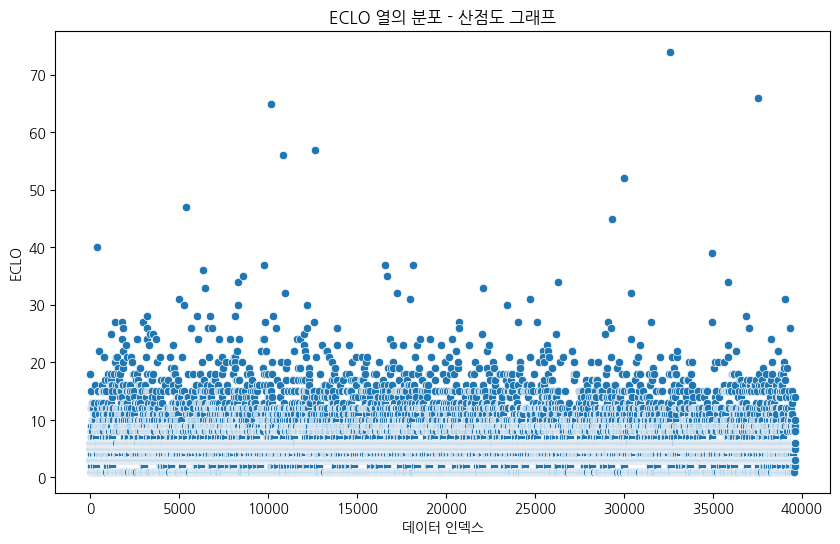

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df.index, y=train_df['ECLO'])
plt.title('ECLO 열의 분포 - 산점도 그래프')
plt.xlabel('데이터 인덱스')
plt.ylabel('ECLO')
plt.show()


In [ ]:
# def eclo_group(a):
#     if a<=2:
#         return 'very safe'
#     elif a<=3:
#         return 'safe'
#     elif a<=9:
#         return 'normal'
#     elif a<=20:
#         return 'dangerous'
#     else:
#         return 'very dangerous'

# train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group)
# train_df['ECLO_group'].value_counts()

In [ ]:
def eclo_group(a):
    if a<=2:
        return 'very safe'
    elif a<=4:
        return 'safe'
    elif a<=9:
        return 'normal'
    else:
        return 'dangerous'

train_1920['ECLO_group'] = train_1920['ECLO'].apply(eclo_group)
train_1920['ECLO_group'].value_counts()

<ipython-input-17-ee4a6e2d64b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1920['ECLO_group'] = train_1920['ECLO'].apply(eclo_group)


safe         13196
normal       10271
dangerous     2020
very safe     1989
Name: ECLO_group, dtype: int64

In [ ]:
test_21['ECLO_group'] = test_21['ECLO'].apply(eclo_group)
test_21['ECLO_group'].value_counts()

<ipython-input-18-d39533ee2062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_21['ECLO_group'] = test_21['ECLO'].apply(eclo_group)


safe         6297
normal       4382
very safe     739
dangerous     715
Name: ECLO_group, dtype: int64

#train_1920 EDA (시각화)

In [ ]:
train_1920.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27471 entries, 0 to 27475
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          27471 non-null  object
 1   기상상태        27471 non-null  object
 2   시군구         27471 non-null  object
 3   도로형태        27471 non-null  object
 4   노면상태        27471 non-null  object
 5   사고유형        27471 non-null  object
 6   법규위반        27471 non-null  object
 7   사망자수        27471 non-null  int64 
 8   중상자수        27471 non-null  int64 
 9   경상자수        27471 non-null  int64 
 10  부상자수        27471 non-null  int64 
 11  ECLO        27471 non-null  int64 
 12  year        27471 non-null  int64 
 13  month       27471 non-null  int64 
 14  hour        27471 non-null  int64 
 15  ECLO_group  27471 non-null  object
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


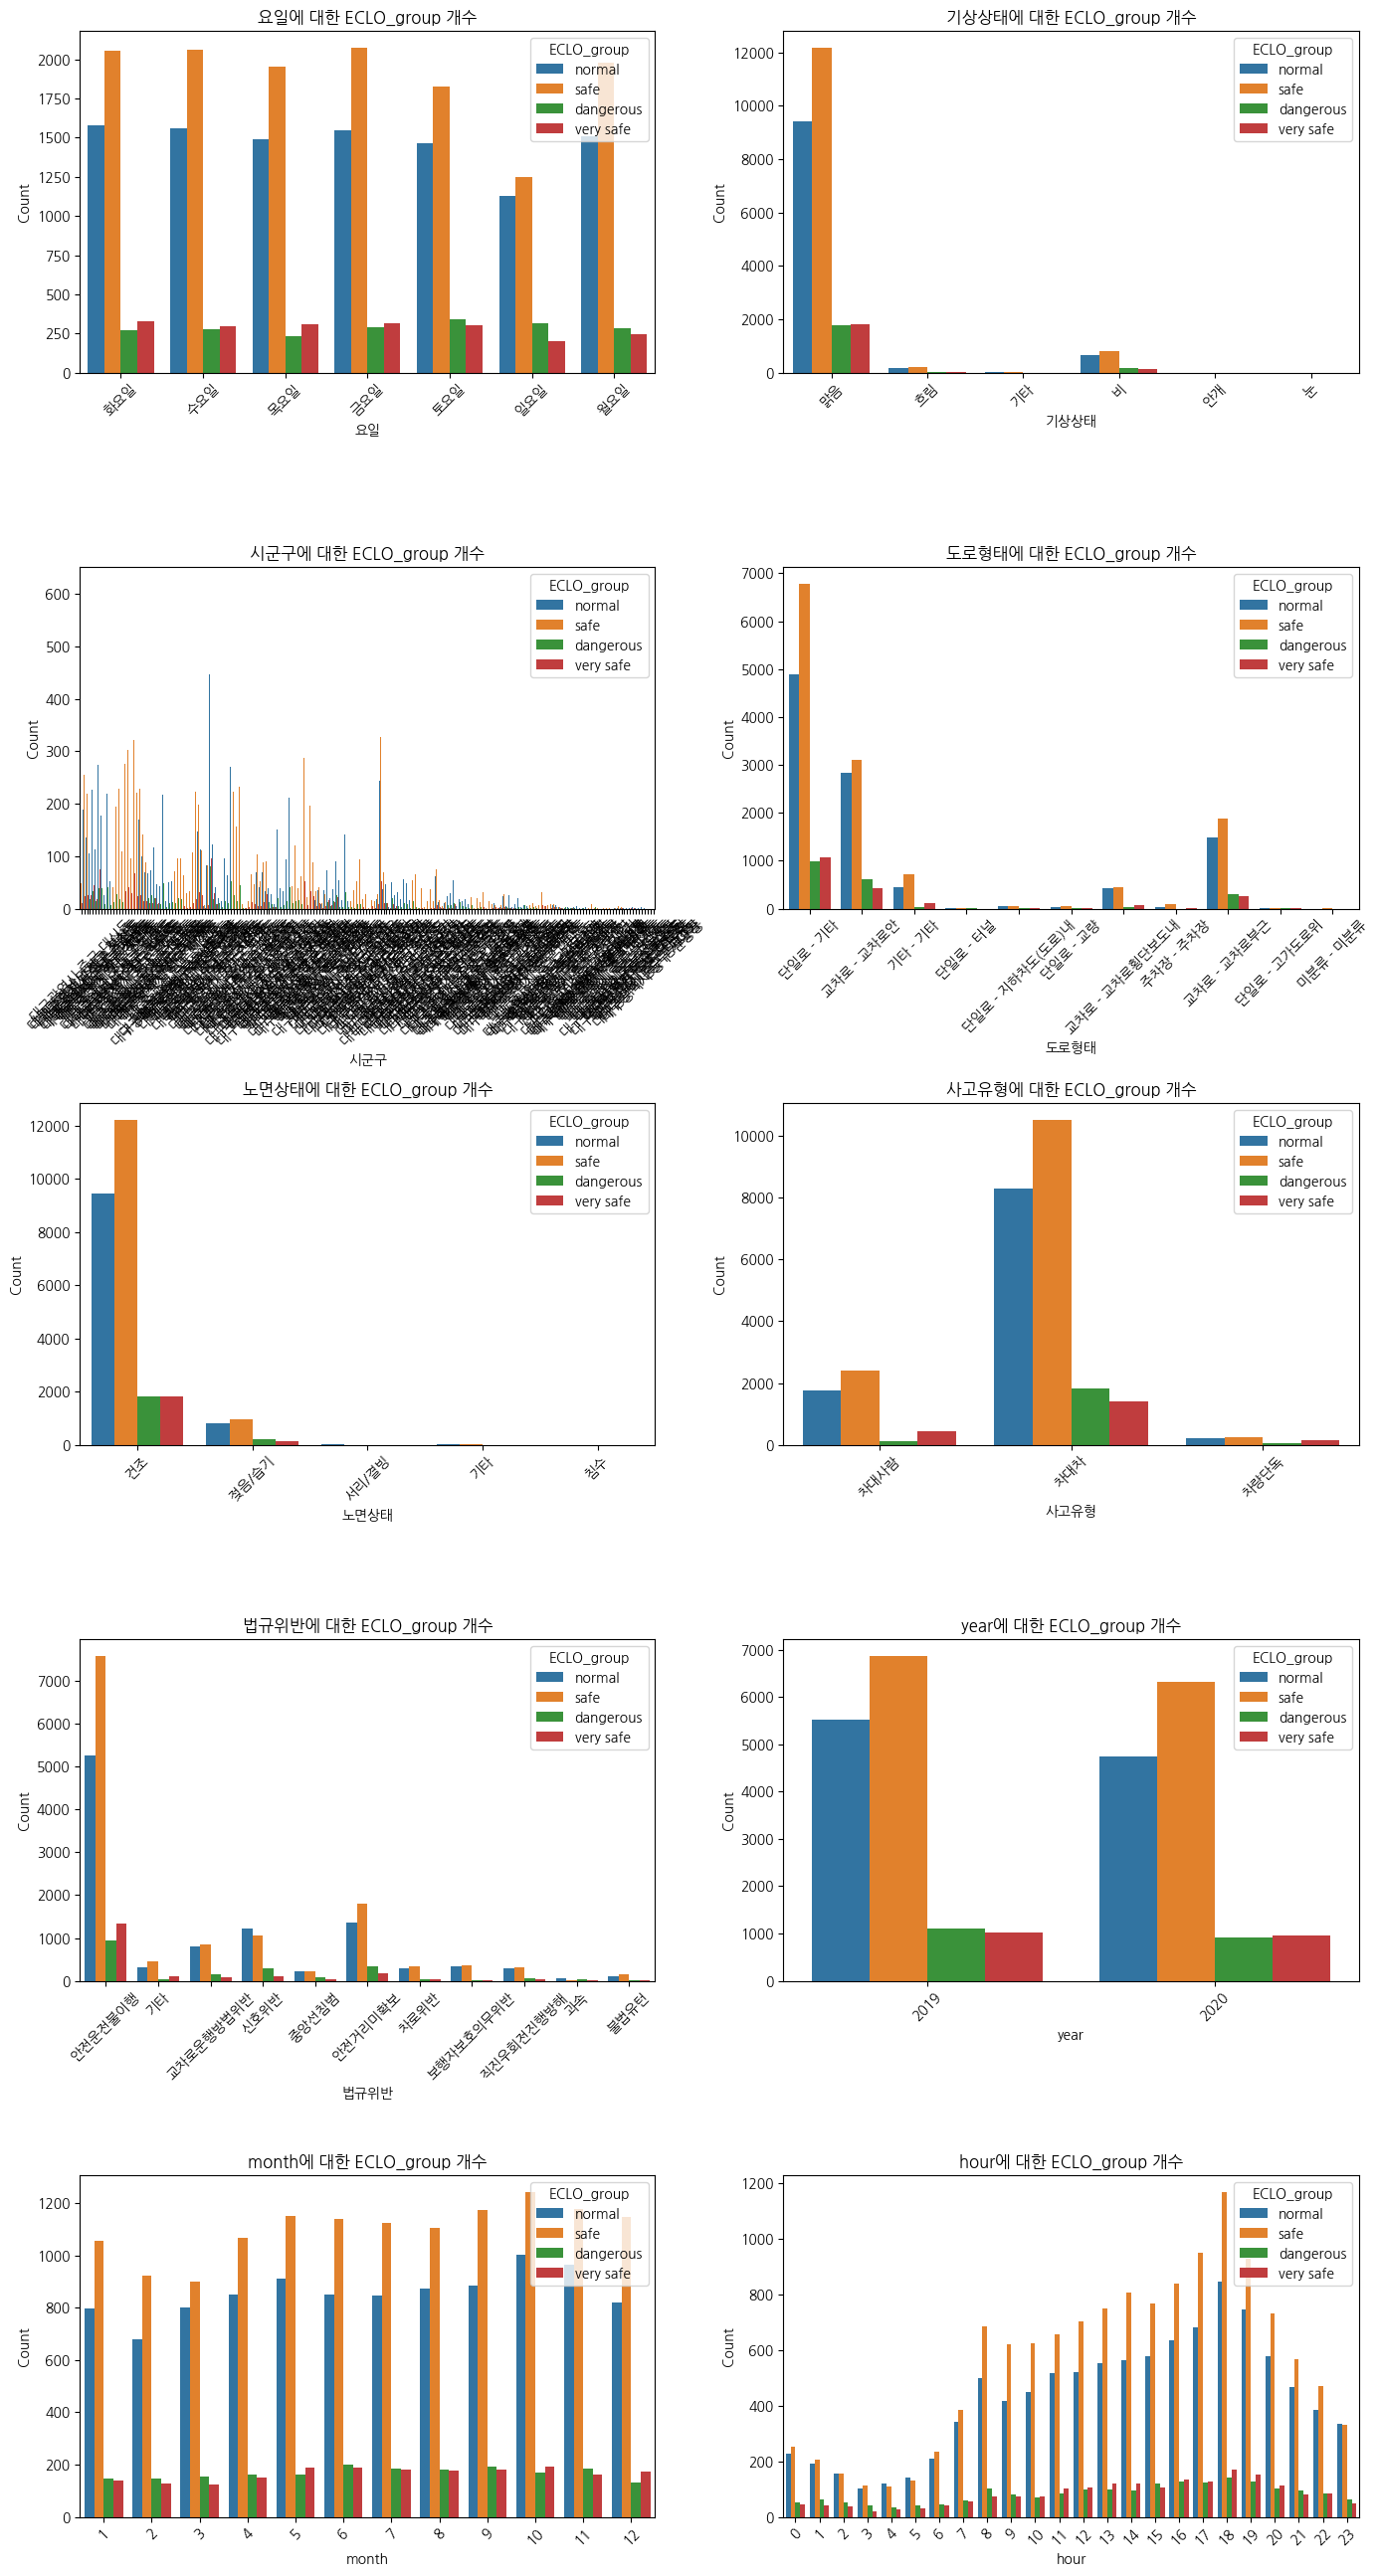

In [ ]:
# 그래프의 행과 열 개수
rows, cols = 5, 2

# 그래프 크기 설정
plt.figure(figsize=(14, 26))

# 열 이름 리스트
columns = ['요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '법규위반', 'year', 'month', 'hour']

# 서브플롯 인덱스 초기화
i = 1

# 각 열에 대해 그래프 그리기
for col in columns:
    plt.subplot(rows, cols, i)
    sns.countplot(x=train_1920[col], hue=train_1920['ECLO_group'])
    plt.xticks(rotation=45)
    plt.title(f'{col}에 대한 ECLO_group 개수')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='ECLO_group', loc='upper right')
    i += 1

plt.tight_layout()
plt.show()


#Random Forest

원핫인코딩 해야돼서 인코딩하고 다시 데이터분리했음;;
필요한 열들만 뽑아서 train_df1 생성

In [ ]:
def eclo_group(a):
    if a<=2:
        return 'very safe'
    elif a<=4:
        return 'safe'
    elif a<=9:
        return 'normal'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group)
train_df['ECLO_group'].value_counts()

safe         19493
normal       14653
dangerous     2735
very safe     2728
Name: ECLO_group, dtype: int64

In [ ]:
train_df1 = train_df[['요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','year','month','hour','ECLO_group']]
train_df1.info()

KeyError: ignored

In [ ]:
#One - Hot Encoding
train_df1 = pd.get_dummies(train_df1, columns=['요일','기상상태','시군구','도로형태','노면상태','사고유형'])

In [ ]:
# 'year' 열을 기준으로 2019, 2020년과 2021년 데이터 분리
train_1920 = train_df1[(train_df1['year'] == 2019) | (train_df1['year'] == 2020)]
test_21 = train_df1[train_df1['year'] == 2021]

In [ ]:
train_1920

,year,month,hour,ECLO_group,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,...,도로형태_주차장 - 주차장,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,사고유형_차대사람,사고유형_차대차,사고유형_차량단독
0,2019,1,0,normal,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2019,1,0,safe,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2019,1,1,safe,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2019,1,2,normal,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2019,1,4,safe,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27471,2020,12,20,safe,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
27472,2020,12,21,safe,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
27473,2020,12,21,safe,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
27474,2020,12,22,safe,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
test_21

,year,month,hour,ECLO_group,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,...,도로형태_주차장 - 주차장,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,사고유형_차대사람,사고유형_차대차,사고유형_차량단독
27476,2021,1,9,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
27477,2021,1,9,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
27478,2021,1,13,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
27479,2021,1,13,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
27480,2021,1,14,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,2021,12,19,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
39605,2021,12,19,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
39606,2021,12,21,dangerous,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
39607,2021,12,22,safe,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
train_x = train_1920.drop(['ECLO_group'],axis = 1)
train_y = train_1920['ECLO_group']
test_x = test_21.drop(['ECLO_group'],axis = 1)
test_y = test_21['ECLO_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# RandomForestClassifier 모델 정의
model = RandomForestClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='micro')
f1_3 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'micro F1 Score: {f1_2}')
print(f'macro F1 Score: {f1_3}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.4353371220803878
micro F1 Score: 0.46756779032391
macro F1 Score: 0.25100040565683757
Accuracy: 0.46756779032391
Macro Precision: 0.2750484242160373
              precision    recall  f1-score   support

   dangerous       0.05      0.01      0.01       715
      normal       0.37      0.33      0.35      4382
        safe       0.53      0.67      0.59      6297
   very safe       0.15      0.03      0.05       739

    accuracy                           0.47     12133
   macro avg       0.28      0.26      0.25     12133
weighted avg       0.42      0.47      0.44     12133



#xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 문자열 클래스 레이블을 숫자로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBClassifier 모델 정의
model = XGBClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train_encoded)

# 테스트 데이터 예측
predictions = model.predict(test_x)

In [ ]:
# LabelEncoder를 사용하여 문자열 클래스 레이블을 숫자로 변환
label_encoder = LabelEncoder()
test_y_encoded = label_encoder.fit_transform(test_y)

# F1 스코어 계산
f1_1 = f1_score(test_y_encoded, predictions, average='weighted')
f1_2 = f1_score(test_y_encoded, predictions, average='micro')
f1_3 = f1_score(test_y_encoded, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'micro F1 Score: {f1_2}')
print(f'macro F1 Score: {f1_3}')

# 정확도 계산
accuracy = accuracy_score(test_y_encoded, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y_encoded, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y_encoded, predictions))

Weighted F1 Score: 0.4297162623385093
micro F1 Score: 0.5016896068573312
macro F1 Score: 0.23829779605942628
Accuracy: 0.5016896068573312
Macro Precision: 0.34306323384087
              precision    recall  f1-score   support

           0       0.21      0.01      0.02       715
           1       0.38      0.18      0.25      4382
           2       0.53      0.83      0.65      6297
           3       0.25      0.02      0.04       739

    accuracy                           0.50     12133
   macro avg       0.34      0.26      0.24     12133
weighted avg       0.44      0.50      0.43     12133



#LightGBM

In [ ]:
import lightgbm as lgb

# LightGBM 모델 정의
model = lgb.LGBMClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 21980, number of used features: 162
[LightGBM] [Info] Start training from score -2.619505
[LightGBM] [Info] Start training from score -0.981133
[LightGBM] [Info] Start training from score -0.732965
[LightGBM] [Info] Start training from score -2.633975


In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='micro')
f1_3 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'micro F1 Score: {f1_2}')
print(f'macro F1 Score: {f1_3}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.4340488947536148
micro F1 Score: 0.5039973625649057
macro F1 Score: 0.2357793023252633
Accuracy: 0.5039973625649057
Macro Precision: 0.37482790327118315
              precision    recall  f1-score   support

   dangerous       0.38      0.00      0.01       715
      normal       0.39      0.20      0.27      4382
        safe       0.53      0.83      0.65      6297
   very safe       0.20      0.01      0.02       739

    accuracy                           0.50     12133
   macro avg       0.37      0.26      0.24     12133
weighted avg       0.45      0.50      0.43     12133



#회귀 후 그룹화해서 분류 평가지표 활용

In [ ]:
def eclo_group(a):
    if a<=2:
        return 'very safe'
    elif a<=4:
        return 'safe'
    elif a<=9:
        return 'normal'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group)
train_df['ECLO_group'].value_counts()

safe         19493
normal       14653
dangerous     2735
very safe     2728
Name: ECLO_group, dtype: int64

In [ ]:
train_df1 = train_df[['요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','year','month','hour','ECLO','ECLO_group']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          39609 non-null  object
 1   기상상태        39609 non-null  object
 2   시군구         39609 non-null  object
 3   도로형태        39609 non-null  object
 4   노면상태        39609 non-null  object
 5   사고유형        39609 non-null  object
 6   year        39609 non-null  int64 
 7   month       39609 non-null  int64 
 8   hour        39609 non-null  int64 
 9   ECLO        39609 non-null  int64 
 10  ECLO_group  39609 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


In [ ]:
#원핫인코딩
train_df1 = pd.get_dummies(train_df1, columns=['요일','기상상태','시군구','도로형태','노면상태','사고유형'])

In [ ]:
# 'year' 열을 기준으로 2019, 2020년과 2021년 데이터 분리
train_1920 = train_df1[(train_df1['year'] == 2019) | (train_df1['year'] == 2020)]
test_21 = train_df1[train_df1['year'] == 2021]

In [ ]:
train_x = train_1920.drop(['ECLO','ECLO_group'],axis = 1)
train_y = train_1920['ECLO']
test_x = test_21.drop(['ECLO','ECLO_group'],axis = 1)
test_y = test_21['ECLO_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
from xgboost import XGBRegressor

# XGBoost 회귀 모델 정의
model = XGBRegressor(random_state=84)

# 모델 학습
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=84, ...)

In [ ]:
# 모델을 사용하여 test_x에 대한 예측 수행
predictions = model.predict(test_x)

In [ ]:
predictions

array([3.5576816, 5.0870357, 3.9959571, ..., 5.7693405, 4.5960293,
       5.2194433], dtype=float32)

In [ ]:
# 예측값에 대해 eclo_group 함수 적용
predictions = [eclo_group(pred) for pred in predictions]

# 결과 출력 또는 사용
predictions

['safe',
 'normal',
 'safe',
 'normal',
 'safe',
 'normal',
 'normal',
 'normal',
 'safe',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'safe',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'safe',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'safe',
 'normal',
 'normal',
 'normal',
 'normal',
 'safe',
 'safe',
 'normal',
 'normal',
 'normal',
 'safe',
 'safe',
 'normal',
 'normal',
 'safe',
 'normal',
 'normal',
 'safe',
 'dangerous',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'safe',
 'safe',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'safe',
 'normal',
 'normal',
 'safe',
 'normal',
 'normal',
 'normal

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='micro')
f1_3 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'micro F1 Score: {f1_2}')
print(f'macro F1 Score: {f1_3}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.3332040715725627
micro F1 Score: 0.39676914200939584
macro F1 Score: 0.20439247398271312
Accuracy: 0.39676914200939584
Macro Precision: 0.25578335246875883
              precision    recall  f1-score   support

   dangerous       0.12      0.01      0.02       715
      normal       0.37      0.81      0.50      4382
        safe       0.54      0.20      0.29      6297
   very safe       0.00      0.00      0.00       739

    accuracy                           0.40     12133
   macro avg       0.26      0.26      0.20     12133
weighted avg       0.42      0.40      0.33     12133

